# 中级计量第五次作业

## 第18章 时间序列高级专题 

*C11 P547 
本题利用VOLAT.RAW中的数据。*

**思路**：
1. 导入数据集
2. 查看原始数据的变量及描述

In [4]:
# 导入wooldridge包
library(wooldridge)

Warning message:
"package 'wooldridge' was built under R version 3.4.4"

In [5]:
# 查看volat数据集的表头
head(volat)

date,sp500,divyld,i3,ip,pcsp,rsp500,pcip,ci3,ci3_1,ci3_2,pcip_1,pcip_2,pcip_3,pcsp_1,pcsp_2,pcsp_3
1947.01,15.21,4.49,0.38,22.4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1947.02,15.80,4.38,0.38,22.5,46.54833,50.92833,5.357163,0,NA,NA,NA,NA,NA,NA,NA,NA
1947.03,15.16,4.61,0.38,22.6,-48.60762,-43.99762,5.333354,0,0,NA,5.357163,NA,NA,46.54833,NA,NA
1947.04,14.60,4.75,0.38,22.5,-44.32714,-39.57714,-5.309754,0,0,0,5.333354,5.357163,NA,-48.60762,46.54833,NA
1947.05,14.34,5.05,0.38,22.6,-21.36988,-16.31988,5.333354,0,0,0,-5.309754,5.333354,5.357163,-44.32714,-48.60762,46.54833
1947.06,14.84,5.03,0.38,22.6,41.84100,46.87100,0.000000,0,0,0,5.333354,-5.309754,5.333354,-21.36988,-44.32714,-48.60762


In [26]:
# 查看volat数据集的变量描述
??wooldridge::volat

![](https://wx3.sinaimg.cn/mw1024/a7a8667agy1fqvph70g5vj20on0hmgmi.jpg)

*(i) 证实lsp500 = log(sp500)和lip=log(ip)看来都包含了单位根。利用含四阶滞后变化的DF检验，在含和不含线性时间趋势的情况下分别进行检验。*


**思路**：
1. 画出散点图，查看时间序列的基本特征（初步判断线性时间趋势）
2. 画出自相关图，查看时间序列自相关情况（初步判断单位根过程）
3. 进行ADF检验（包含和不包含时间趋势的检验对比）（检验单位根过程）

In [35]:
# 安装用于时间序列分析的R包
install.packages("TSA",dependencies=TRUE)
install.packages("urca",dependencies=TRUE)


Installing package into 'C:/Users/narut/Documents/R/win-library/3.4'
(as 'lib' is unspecified)
Warning message:
"package 'TSA' is in use and will not be installed"Installing package into 'C:/Users/narut/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'urca' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\narut\AppData\Local\Temp\RtmpY596mf\downloaded_packages


In [89]:
# 创建lsp500和lip的时间序列数据
library(TSA)
lsp500<-ts(log(volat$sp500),start=c(1947,1),end=c(1993,6),frequency=12)
lip<-ts(log(volat$ip),start=c(1947,1),end=c(1993,6),frequency=12)

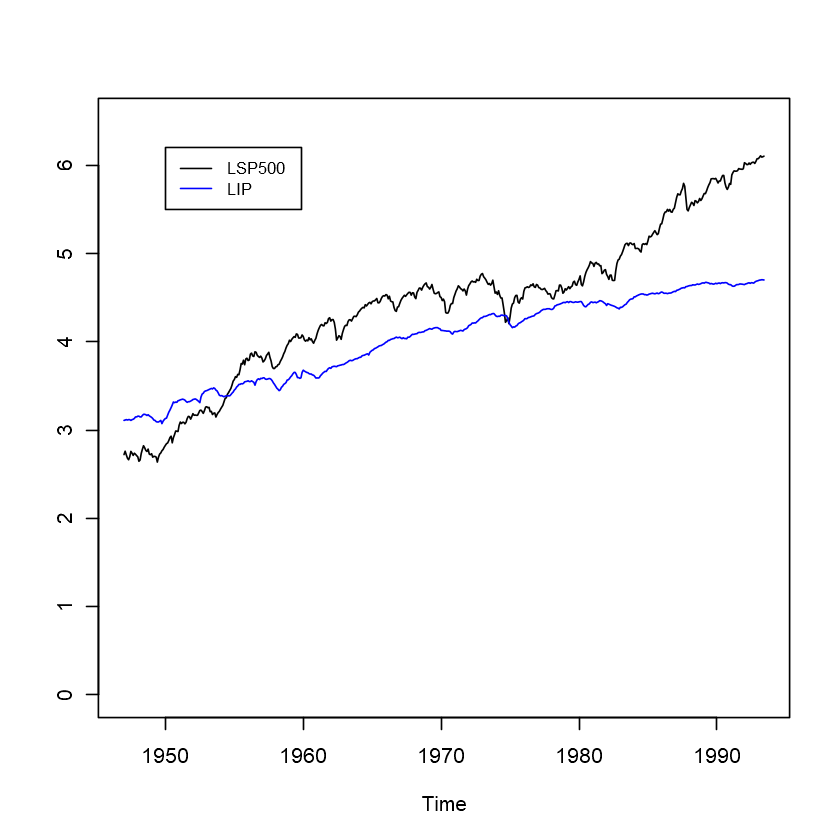

In [25]:
# 画出lsp500和lip的时间序列图，初步判断序列平稳性
plot.ts(lsp500,ylab="",ylim=c(0,6.5));lines(lip,col=4);legend(1950,6.2,legend=c("LSP500","LIP"),col=c("black","blue"),lty=1,cex=0.8)

**解释**：（自行添加，非标准答案）
从上图可看出，该时间序列不平稳，存在趋势性特征，且两个时间序列可能具有一些共同的趋势

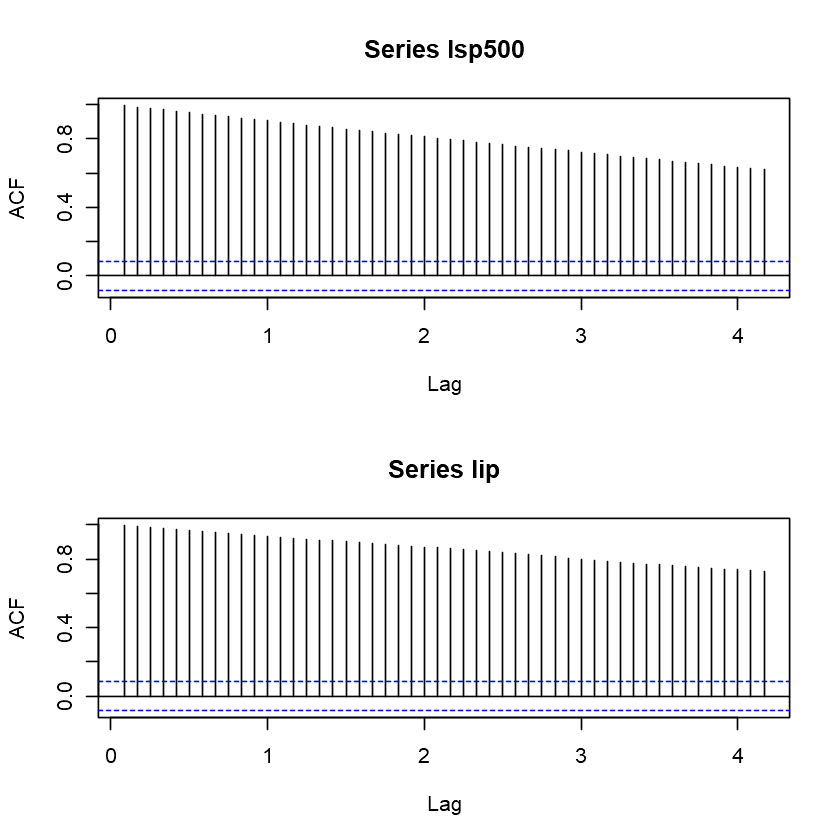

In [34]:
# 画出自相关图，初步判断单位根过程
par(mfrow=c(2,1))
acf(lsp500,lag.max=50)
acf(lip,lag.max=50)

**解释**：（自行添加，非标准答案）
从自相关图可知，lsp500和lip序列的自相关系数呈缓慢衰减趋势，因此，可能存在单位根


In [54]:
# 进行ADF检验，判断是否存在单位根过程
library(urca)#导入用于单位根和协整检验的R包urca
#（1）关于lsp500序列的ADF检验
df.lsp500_trend<-ur.df(lsp500,type=c("trend"),lags=4)#带线性时间趋势的adf检验（滞后阶为4）
df.lsp500_none<-ur.df(lsp500,type=c("none"),lags=4)#不带线性时间趋势的adf检验（滞后阶为4）
summary(df.lsp500_trend);summary(df.lsp500_none)#报告关于lsp500的ADF检验结果



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.118961 -0.018376  0.002415  0.020044  0.110475 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.255e-02  1.721e-02   2.472   0.0137 *  
z.lag.1     -1.259e-02  5.717e-03  -2.201   0.0281 *  
tt           6.331e-05  3.073e-05   2.060   0.0398 *  
z.diff.lag1  2.684e-01  4.260e-02   6.302 6.08e-10 ***
z.diff.lag2 -7.699e-02  4.411e-02  -1.746   0.0815 .  
z.diff.lag3  2.209e-02  4.401e-02   0.502   0.6160    
z.diff.lag4  5.093e-02  4.256e-02   1.197   0.2320    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.03255 on 546 degrees of freedom
Multiple R-squared:  0.07614,	Adjusted R-squared:  0.06599 
F-statistic


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.122948 -0.017954  0.002313  0.021356  0.108217 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
z.lag.1      0.0009796  0.0003230   3.033  0.00254 ** 
z.diff.lag1  0.2657859  0.0427126   6.223 9.72e-10 ***
z.diff.lag2 -0.0829928  0.0441744  -1.879  0.06081 .  
z.diff.lag3  0.0168864  0.0441148   0.383  0.70203    
z.diff.lag4  0.0442485  0.0425862   1.039  0.29925    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.03268 on 548 degrees of freedom
Multiple R-squared:  0.09641,	Adjusted R-squared:  0.08816 
F-statistic: 11.69 on 5 and 548 DF,  p-value: 9.35e-11


Value of test-statistic is: 3.033 

Critical values for test statistic


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.121650 -0.018090  0.002093  0.020744  0.109540 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.185e-03  2.839e-03   1.826   0.0684 .  
z.lag.1     -7.604e-01  7.123e-02 -10.675   <2e-16 ***
tt          -1.580e-06  8.701e-06  -0.182   0.8559    
z.diff.lag1  2.454e-02  6.327e-02   0.388   0.6983    
z.diff.lag2 -5.930e-02  5.279e-02  -1.123   0.2617    
z.diff.lag3 -4.309e-02  4.256e-02  -1.013   0.3117    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.03266 on 547 degrees of freedom
Multiple R-squared:  0.3842,	Adjusted R-squared:  0.3785 
F-statistic: 68.25 on 5 and 547 DF,  p-value: < 2.2e-16


Value of t


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.11871 -0.01378  0.00611  0.02537  0.11360 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
z.lag.1     -0.69093    0.06850 -10.087   <2e-16 ***
z.diff.lag1 -0.02479    0.06191  -0.400   0.6890    
z.diff.lag2 -0.09365    0.05213  -1.797   0.0729 .  
z.diff.lag3 -0.06277    0.04246  -1.478   0.1399    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.03292 on 549 degrees of freedom
Multiple R-squared:  0.3722,	Adjusted R-squared:  0.3676 
F-statistic: 81.37 on 4 and 549 DF,  p-value: < 2.2e-16


Value of test-statistic is: -10.0866 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


**解释**：
根据上表：带时间趋势的lsp500的adf检验统计量为-2.2012大于其对应的adf检验(10%)临界值-3.12;不带时间趋势的lsp500的adf检验统计量为3.033大于其对应的adf检验（10%）临界值-1.62,因此，在10%的显著性水平下，lsp500（带和不带时间趋势）都不能拒绝存在单位根的原假设，即序列非平稳


In [90]:
#（2）关于lip序列的ADF检验
df.lip_trend<-ur.df(lip,type=c("trend"),lags=4)#带线性时间趋势的adf检验（滞后阶为4）
df.lip_none<-ur.df(lip,type=c("none"),lags=4)#不带线性时间趋势的adf检验（滞后阶为4）
summary(df.lip_trend);summary(df.lip_none)#报告关于lip的ADF检验结果



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.044484 -0.005189 -0.000138  0.004644  0.067419 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.292e-02  1.620e-02   2.650  0.00829 ** 
z.lag.1     -1.279e-02  5.077e-03  -2.519  0.01207 *  
tt           3.565e-05  1.541e-05   2.314  0.02104 *  
z.diff.lag1  3.505e-01  4.255e-02   8.236 1.32e-15 ***
z.diff.lag2  7.684e-02  4.502e-02   1.707  0.08845 .  
z.diff.lag3  7.204e-02  4.506e-02   1.599  0.11046    
z.diff.lag4  1.531e-02  4.285e-02   0.357  0.72109    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01004 on 546 degrees of freedom
Multiple R-squared:  0.1786,	Adjusted R-squared:  0.1695 
F-statistic: 


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.041206 -0.005213 -0.000024  0.004678  0.069157 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
z.lag.1     0.0003338  0.0001126   2.963  0.00318 ** 
z.diff.lag1 0.3528645  0.0427293   8.258 1.11e-15 ***
z.diff.lag2 0.0728576  0.0451946   1.612  0.10752    
z.diff.lag3 0.0663268  0.0451917   1.468  0.14277    
z.diff.lag4 0.0050511  0.0427254   0.118  0.90593    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.0101 on 548 degrees of freedom
Multiple R-squared:  0.2187,	Adjusted R-squared:  0.2116 
F-statistic: 30.68 on 5 and 548 DF,  p-value: < 2.2e-16


Value of test-statistic is: 2.9634 

Critical values for test statistics: 
   

**解释**：
根据上表：带时间趋势的lip的adf检验统计量为-2.5186大于其对应的adf检验(10%)临界值-3.12;不带时间趋势的lip的adf检验统计量为2.9634大于其对应的adf检验（10%）临界值-1.62,因此，在10%的显著性水平下，lip（带和不带时间趋势）都不能拒绝存在单位根的原假设，即序列非平稳；

*(ii) 做lsp500对lip的简单回归。评论t统计量和$R^{2}$的大小。*

In [49]:
# 对lsp500和lip做简单回归
simple_reg<-lm(lsp500~lip)#创建回归模型并计算
summary(simple_reg)#输出回归结果


Call:
lm(formula = lsp500 ~ lip)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6615 -0.2012 -0.0231  0.2236  0.5565 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.40173    0.09549  -25.15   <2e-16 ***
lip          1.69407    0.02354   71.97   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2714 on 556 degrees of freedom
Multiple R-squared:  0.9031,	Adjusted R-squared:  0.9029 
F-statistic:  5179 on 1 and 556 DF,  p-value: < 2.2e-16


**解释**：
lip对应的t统计量为71.97，系数高度显著，$R^{2}$为0.9031,拟合优度很高，但由于lsp500和lip序列均非平稳，因此可能存在伪回归问题

*(iii) 利用第(ii)部分的残差检验lsp500和lip是否协整。利用标准的DF检验和包含两阶滞后的ADF检验。你得到什么结论？*

**思路**：

协整检验步骤：
1. 判断lsp500和lip是否为同阶单整
2. 检验回归的残差序列是否平稳

In [55]:
#检验lsp500和lip是否同阶单整
summary(ur.df(diff(lsp500),type=c("trend"),lag=3))#对带趋势的lsp500的一阶差分分进行ADF检验
summary(ur.df(diff(lsp500),type=c("none"),lag=3))#对不带趋势的lsp500的一阶差分进行ADF检验
summary(ur.df(diff(lip),type=c("trend"),lag=3))#对带趋势的lip的一阶差分进行ADF检验
summary(ur.df(diff(lip),type=c("none"),lag=3))#对不带趋势的lip的一阶差分进行ADF检验


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.121650 -0.018090  0.002093  0.020744  0.109540 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.185e-03  2.839e-03   1.826   0.0684 .  
z.lag.1     -7.604e-01  7.123e-02 -10.675   <2e-16 ***
tt          -1.580e-06  8.701e-06  -0.182   0.8559    
z.diff.lag1  2.454e-02  6.327e-02   0.388   0.6983    
z.diff.lag2 -5.930e-02  5.279e-02  -1.123   0.2617    
z.diff.lag3 -4.309e-02  4.256e-02  -1.013   0.3117    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.03266 on 547 degrees of freedom
Multiple R-squared:  0.3842,	Adjusted R-squared:  0.3785 
F-statistic: 68.25 on 5 and 547 DF,  p-value: < 2.2e-16


Value of t


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.11871 -0.01378  0.00611  0.02537  0.11360 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
z.lag.1     -0.69093    0.06850 -10.087   <2e-16 ***
z.diff.lag1 -0.02479    0.06191  -0.400   0.6890    
z.diff.lag2 -0.09365    0.05213  -1.797   0.0729 .  
z.diff.lag3 -0.06277    0.04246  -1.478   0.1399    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.03292 on 549 degrees of freedom
Multiple R-squared:  0.3722,	Adjusted R-squared:  0.3676 
F-statistic: 81.37 on 4 and 549 DF,  p-value: < 2.2e-16


Value of test-statistic is: -10.0866 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.042232 -0.005294 -0.000143  0.004728  0.068127 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.183e-03  8.979e-04   2.432   0.0154 *  
z.lag.1     -5.140e-01  5.683e-02  -9.044   <2e-16 ***
tt          -2.559e-06  2.700e-06  -0.948   0.3436    
z.diff.lag1 -1.367e-01  5.634e-02  -2.427   0.0155 *  
z.diff.lag2 -6.607e-02  5.092e-02  -1.298   0.1949    
z.diff.lag3 -1.978e-03  4.273e-02  -0.046   0.9631    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01009 on 547 degrees of freedom
Multiple R-squared:  0.3128,	Adjusted R-squared:  0.3066 
F-statistic: 49.81 on 5 and 547 DF,  p-value: < 2.2e-16


Value of t


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.040349 -0.004030  0.001021  0.005746  0.070878 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
z.lag.1     -0.44526    0.05331  -8.352 5.52e-16 ***
z.diff.lag1 -0.18527    0.05483  -3.379 0.000778 ***
z.diff.lag2 -0.10042    0.05025  -1.999 0.046154 *  
z.diff.lag3 -0.02203    0.04264  -0.517 0.605652    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01017 on 549 degrees of freedom
Multiple R-squared:  0.2991,	Adjusted R-squared:  0.294 
F-statistic: 58.58 on 4 and 549 DF,  p-value: < 2.2e-16


Value of test-statistic is: -8.3517 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


**解释**：
1. 经过一阶差分后，带时间趋势的lsp500,adf检验统计量为-10.6752小于其对应的adf检验(1%)临界值-3.96;不带时间趋势的lsp500，其adf检验统计量为-10.0866小于其对应的adf检验（1%）临界值-2.58,因此，在1%的显著性水平下，一阶差分后的lsp500（带和不带时间趋势）都拒绝存在单位根的原假设，即差分序列平稳；
2. 经过一阶差分后，带时间趋势的lip,adf检验统计量为-9.0441小于其对应的adf检验(1%)临界值-3.96;不带时间趋势的lip，其adf检验统计量为-8.3517小于其对应的adf检验（1%）临界值-2.58,因此，在1%的显著性水平下，一阶差分后的lip（带和不带时间趋势）都拒绝存在单位根的原假设，即差分序列平稳；
3. 结合题1，lsp500和lip序列非平稳，差分序列平稳，因此两序列为同阶单整（1阶单整）序列

In [87]:
#检验残差序列的平稳性
summary(ur.df(simple_reg$residuals,type="trend",lags=2))#进行题2中的残差序列进行滞后两阶的ADF检验


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.139292 -0.021645  0.000388  0.023005  0.132472 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -8.540e-04  3.138e-03  -0.272    0.786    
z.lag.1     -9.387e-03  5.822e-03  -1.612    0.107    
tt           6.669e-06  9.736e-06   0.685    0.494    
z.diff.lag1  2.822e-01  4.242e-02   6.651 7.02e-11 ***
z.diff.lag2 -6.498e-02  4.256e-02  -1.527    0.127    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.03664 on 550 degrees of freedom
Multiple R-squared:  0.0776,	Adjusted R-squared:  0.07089 
F-statistic: 11.57 on 4 and 550 DF,  p-value: 5.031e-09


Value of test-statistic is: -1.6124 1.1261 1.47 

Critical value

**解释**：
由上表知，残差序列的检验统计量为-1.6124，大于DF检验的10%临界值-3.12,因此在10%的显著性水平下，不能拒绝存在单位根的原假设，即残差序列非平稳，进而两者不存在协整关系

*(iv) 在第(ii)部分的回归中添加一个线性时间趋势，并利用第(iii)部分同样的检验来检验协整关系。*


In [88]:
trend_reg<-lm(lsp500~lip+time(lsp500))#添加趋势的回归
summary(ur.df(trend_reg$residuals,type="trend",lags=2))#对其进行滞后两阶的ADF检验


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.121425 -0.019186  0.002406  0.020676  0.114019 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.698e-04  2.791e-03   0.240   0.8105    
z.lag.1     -1.074e-02  5.729e-03  -1.874   0.0614 .  
tt           4.914e-07  8.653e-06   0.057   0.9547    
z.diff.lag1  2.682e-01  4.229e-02   6.342 4.75e-10 ***
z.diff.lag2 -8.063e-02  4.238e-02  -1.903   0.0576 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.03266 on 550 degrees of freedom
Multiple R-squared:  0.07251,	Adjusted R-squared:  0.06577 
F-statistic: 10.75 on 4 and 550 DF,  p-value: 2.141e-08


Value of test-statistic is: -1.8742 1.288 1.7592 

Critical val

**解释**：
由上表知，添加时间趋势的残差序列的检验统计量为-1.8742，大于ADF检验的10%临界值-3.12,因此在10%的显著性水平下，不能拒绝存在单位根的原假设，即残差序列非平稳，进而两者不存在协整关系

*(v) 看来股票价格与真实经济活动之间有长期均衡关系吗？*

**解释**：当用lsp500代表股票价格的行为，用lip代表真实经济活动的行为时，两者之间没有长期的均衡关系，即使允许其包含线性时间趋势，两者也不协整

## 尾注
本文档只做参考，非标准答案，如有错误，请指正。